Questions for Week1

Do not change anything in the code ..... just write the functions with the content your are given.

Request: Refrain from using any external source for coding for this week, like chatgpt:( .... all you need in this, is there in the tutorials that were provided. You may see those.

Happy coding :)




While using numpy, we mostly deal with matrix operations. So, let's building our own inverse function

This function:\
1 Takes a np.array of size nXn ... it is your job to check if the matrix is a square matrix or not :)\
2 Returns the inverse of the matrix if possible, otherwise, returns a matrix of 0s

In [4]:
import numpy as np

def inverse(matrix):
    if matrix.shape[0] != matrix.shape[1]:
        return np.zeros(matrix.shape)

    try:
        n = matrix.shape[0]
        identity = np.eye(n)
        augmented = np.hstack((matrix, identity))

        for i in range(n):
            if augmented[i, i] == 0:
                for j in range(i + 1, n):
                    if augmented[j, i] != 0:
                        augmented[[i, j]] = augmented[[j, i]]
                        break

            augmented[i] = augmented[i] / augmented[i, i]

            for j in range(n):
                if i != j:
                    augmented[j] = augmented[j] - augmented[i] * augmented[j, i]

        inverse_matrix = augmented[:, n:]
        return inverse_matrix
    except Exception:
        return np.zeros(matrix.shape)


We won't believe your code this easily man. Hehe :)

Now you will write a code to test out if your inverse is indeed correct

The test function will take an np.array

The test function will return:\
1 True, if the inverse is correct\
2 False if the inverse is incorrect

Isn't it amazing :)

In [3]:
def test(matrix):
    if matrix.shape[0] != matrix.shape[1]:
        return False
    try:
        np_inv = np.linalg.inv(matrix)
        my_inv = inverse(matrix)
        return np.allclose(np_inv, my_inv)
    except np.linalg.LinAlgError:
        return np.allclose(np.zeros(matrix.shape), inverse(matrix))

Okay, I think we should also do something.\
Here is the code to test out your implementations of the upper two functions.

In [5]:
flag = True
for i in range(908):
    n = np.random.randint(2,6)
    m = n + (np.random.randint(0,2) % 2 != 0)
    matrix = np.random.randint(0, 20, size=(n,m)) + np.random.rand(n,m)
    if (not test(matrix)):
        flag = False
        print("You passed", i, "testcases:(")
        break
if (flag):
    print("Congrats!!! You passed all testcases")

You passed 0 testcases:(


Pheww finally numpy done.

Let's move on to pandas and matplotlib

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/data_Q1.csv'
data = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load the file data.csv into a pandas dataframe.

There are a lot of fields in the data. You have to plot, in a different bar graphs:\
1 number of cases with tumor size > 3 vs age\
2 (average breast_quad_left_low and average breast_quad_right_low) vs age for cases of irradiat\
3 (average breast_quad_left_low and average breast_quad_right_low) vs age for cases of non-irradiat\
4 (average breast_quad_left_high and average breast_quad_right_high) vs age for cases of irradiat\
5 (average breast_quad_left_high and average breast_quad_right_high) vs age for cases of non-irradiat

print the total number of cases of irradiat

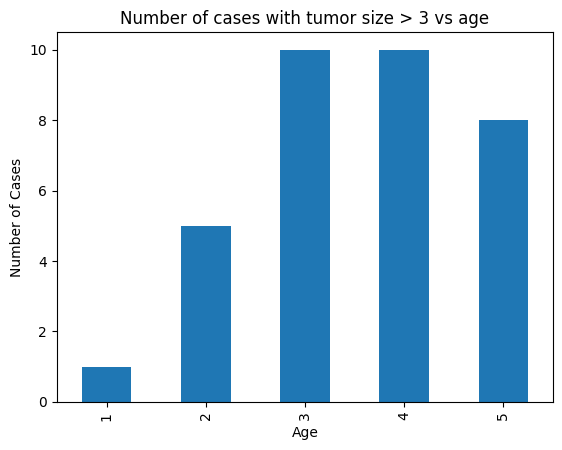

IndexError: index 0 is out of bounds for axis 0 with size 0

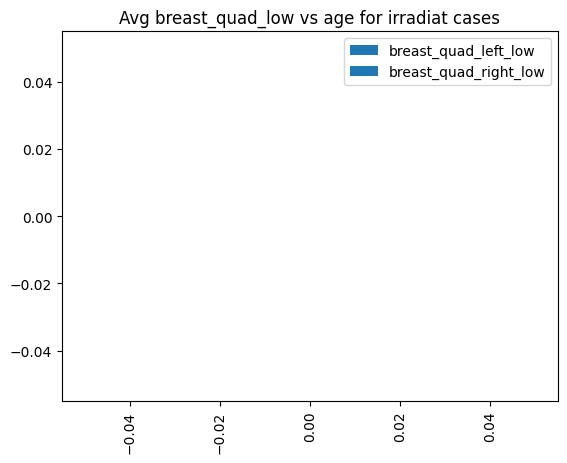

In [14]:

tumor_size_cases = data[data['tumor_size'] > 3].groupby('age').size()
tumor_size_cases.plot(kind='bar', title='Number of cases with tumor size > 3 vs age')
plt.xlabel('Age')
plt.ylabel('Number of Cases')
plt.show()

irradiat_data = data[data['irradiat'] == 'yes']
breast_low_avg_irradiat = irradiat_data.groupby('age')[['breast_quad_left_low', 'breast_quad_right_low']].mean()
breast_low_avg_irradiat.plot(kind='bar', title='Avg breast_quad_low vs age for irradiat cases')
plt.xlabel('Age')
plt.ylabel('Average Value')
plt.show()

non_irradiat_data = data[data['irradiat'] == 'no']
breast_low_avg_non_irradiat = non_irradiat_data.groupby('age')[['breast_quad_left_low', 'breast_quad_right_low']].mean()
breast_low_avg_non_irradiat.plot(kind='bar', title='Avg breast_quad_low vs age for non-irradiat cases')
plt.xlabel('Age')
plt.ylabel('Average Value')
plt.show()

breast_high_avg_irradiat = irradiat_data.groupby('age')[['breast_quad_left_high', 'breast_quad_right_high']].mean()
breast_high_avg_irradiat.plot(kind='bar', title='Avg breast_quad_high vs age for irradiat cases')
plt.xlabel('Age')
plt.ylabel('Average Value')
plt.show()

breast_high_avg_non_irradiat = non_irradiat_data.groupby('age')[['breast_quad_left_high', 'breast_quad_right_high']].mean()
breast_high_avg_non_irradiat.plot(kind='bar', title='Avg breast_quad_high vs age for non-irradiat cases')
plt.xlabel('Age')
plt.ylabel('Average Value')
plt.show()

total_irradiat_cases = len(irradiat_data)
print(f'Total number of cases of irradiat: {total_irradiat_cases}')
